### Лабораторная работа №2. Методы стеганоанализа

Пчелкина Ю.Ж., группа 6231-010402D

Чаплыгин А.О., группа 6231-010402D





#### Обучение

3. Произвести обучение классификатора (модель классификатора выбрать самостоятельно) по выборке, содержащей первые 70 % изображений каждого из двух типов (со встраиванием и без. То есть общий объём обучающей выборки составляет 𝐾∙0,7.


4. Применить обученный классификатор на оставшихся 30 % изображений и оценить качество классификации по мере Accuracy. Вывести результат в виде графиков зависимости Accuracy от 𝑞.


5. Повторить пп. 2-4 для других значений 𝑞 и (при желании) для других векторов признаков.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA



from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, roc_curve, plot_confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('LSB_50.csv')
df.head()

,Image Name,series length 1,series length 2,series length 3,series length 4,series length 5,series length 6,series length 7,series length 8,series length 9,series length 10,series length 11,series length 12,with message
0,Image00001.tif,64722.0,32472.0,16187.0,8298.0,4078.0,2049.0,1112.0,579.0,269.0,126.0,79.0,42.0,1.0
1,Image00002.tif,62360.0,30217.0,15248.0,8099.0,4122.0,2307.0,1250.0,721.0,392.0,236.0,154.0,110.0,1.0
2,Image00003.tif,61795.0,29905.0,15126.0,7871.0,4146.0,2259.0,1297.0,747.0,447.0,236.0,193.0,116.0,1.0
3,Image00004.tif,62414.0,30450.0,15248.0,7777.0,4088.0,2229.0,1200.0,702.0,446.0,251.0,182.0,113.0,1.0
4,Image00005.tif,65529.0,32636.0,16323.0,8080.0,4160.0,2110.0,1027.0,499.0,256.0,157.0,58.0,31.0,1.0


#### Логистическая регрессия

In [3]:
# Классификатор LogisticRegression на полном наборе признаков

df_new = df.drop(columns = ['Image Name'])


# Разделим набор данных на независимые и зависимые переменные. Сохраняем как массив
X = df_new.drop('with message', axis = 1)
Y = df_new['with message']

# поделили на обучающую и тестовую выборки 30/70
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 21)
X_train.shape, X_test.shape

# Нормализуем данные
Log = LogisticRegression()
scaler = StandardScaler()
X_train_M = scaler.fit_transform(X_train)
X_test_M = scaler.transform(X_test)

model_Log = LogisticRegression() 
model_Log.fit(X_train_M, Y_train)
Y_Log = model_Log.predict(X_test_M)

print('F1: ', f1_score(Y_test, Y_Log))
print('accuracy: ', accuracy_score(Y_test, Y_Log))

F1:  0.8288288288288287
accuracy:  0.81


In [4]:
# Классификатор LogisticRegression для больших длин

df_new = df.drop(columns = ['Image Name', 
                            'series length 1', 'series length 2', 
                            'series length 3', 'series length 4',
                            'series length 5', 'series length 6',
                            'series length 7', 'series length 8'])

# Разделим набор данных на независимые и зависимые переменные. Сохраняем как массив
X = df_new.drop('with message', axis = 1)
Y = df_new['with message']

# поделили на обучающую и тестовую выборки 30/70
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 21)
X_train.shape, X_test.shape

# Нормализуем данные
Log = LogisticRegression()
scaler = StandardScaler()
X_train_M = scaler.fit_transform(X_train)
X_test_M = scaler.transform(X_test)

model_Log = LogisticRegression() 
model_Log.fit(X_train_M, Y_train)
Y_Log = model_Log.predict(X_test_M)

print('F1: ', f1_score(Y_test, Y_Log))
print('accuracy: ', accuracy_score(Y_test, Y_Log))

F1:  0.7341040462427746
accuracy:  0.6933333333333334


In [5]:
# Классификатор LogisticRegression для меньших длин

df_new = df.drop(columns = ['Image Name', 
                            'series length 5',
                            'series length 6', 'series length 7', 
                            'series length 8', 'series length 9',
                            'series length 10', 'series length 11',
                            'series length 12'])

# Разделим набор данных на независимые и зависимые переменные. Сохраняем как массив
X = df_new.drop('with message', axis = 1)
Y = df_new['with message']

# поделили на обучающую и тестовую выборки 30/70
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 21)
X_train.shape, X_test.shape

# Нормализуем данные
Log = LogisticRegression()
scaler = StandardScaler()
X_train_M = scaler.fit_transform(X_train)
X_test_M = scaler.transform(X_test)

model_Log = LogisticRegression() 
model_Log.fit(X_train_M, Y_train)
Y_Log = model_Log.predict(X_test_M)

print('F1: ', f1_score(Y_test, Y_Log))
print('accuracy: ', accuracy_score(Y_test, Y_Log))

F1:  0.8108108108108107
accuracy:  0.79


In [6]:
# Только первый и последний

df_title = {'low midle': [], 'high midle': [], 'with message': []}
df_new = pd.DataFrame(df_title)

df_new['low midle'] = df['series length 1']
df_new['high midle'] = df['series length 12']
df_new['with message'] = df['with message']

# Разделим набор данных на независимые и зависимые переменные. Сохраняем как массив
X = df_new.drop('with message', axis = 1)
Y = df_new['with message']

# поделили на обучающую и тестовую выборки 30/70
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 21)
X_train.shape, X_test.shape

# Нормализуем данные
Log = LogisticRegression()
scaler = StandardScaler()
X_train_M = scaler.fit_transform(X_train)
X_test_M = scaler.transform(X_test)

model_Log = LogisticRegression() 
model_Log.fit(X_train_M, Y_train)
Y_Log = model_Log.predict(X_test_M)

print('F1: ', f1_score(Y_test, Y_Log))
print('accuracy: ', accuracy_score(Y_test, Y_Log))

F1:  0.8096676737160121
accuracy:  0.79


In [7]:
# Пробуем объединять признаки. Берем среднее по 3-м маленьким длинам и среднее по 3-м большим

df_title = {'low midle': [], 'high midle': [], 'with message': []}
df_new = pd.DataFrame(df_title)

df_new['low midle'] = round((df['series length 1'] + df['series length 2'] + df['series length 3'])/3)
df_new['high midle'] = round((df['series length 10'] + df['series length 11'] + df['series length 12'])/3)
df_new['with message'] = df['with message']

# Разделим набор данных на независимые и зависимые переменные. Сохраняем как массив
X = df_new.drop('with message', axis = 1)
Y = df_new['with message']

# поделили на обучающую и тестовую выборки 30/70
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 21)
X_train.shape, X_test.shape

# Нормализуем данные
Log = LogisticRegression()
scaler = StandardScaler()
X_train_M = scaler.fit_transform(X_train)
X_test_M = scaler.transform(X_test)

model_Log = LogisticRegression() 
model_Log.fit(X_train_M, Y_train)
Y_Log = model_Log.predict(X_test_M)

print('F1: ', f1_score(Y_test, Y_Log))
print('accuracy: ', accuracy_score(Y_test, Y_Log))

F1:  0.8106508875739645
accuracy:  0.7866666666666666


В случае логистической регрессии лучшие результаты получили при полном наборе принаков. Аccuracy =  0.81 

#### Метод опорных векторов (SVC)

In [8]:
# Классификатор SVC на полном наборе признаков

df_new = df.drop(columns = ['Image Name'])


# Разделим набор данных на независимые и зависимые переменные. Сохраняем как массив
X = df_new.drop('with message', axis = 1)
Y = df_new['with message']

# поделили на обучающую и тестовую выборки 30/70
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 21)
X_train.shape, X_test.shape

# Нормализуем данные
scale_features_mm = MinMaxScaler()
X_train_new = scale_features_mm.fit_transform(X_train) 
X_test_new = scale_features_mm.fit_transform(X_test)


model_SVC = SVC()
model_SVC.fit(X_train_new, Y_train)
Y_SVC = model_SVC.predict(X_test_new)


print('F1: ', f1_score(Y_test, Y_SVC))
print('accuracy: ', accuracy_score(Y_test, Y_SVC))

F1:  0.7828746177370031
accuracy:  0.7633333333333333


In [9]:
# Классификатор SVC для больших длин

df_new = df.drop(columns = ['Image Name', 
                            'series length 1', 'series length 2', 
                            'series length 3', 'series length 4',
                            'series length 5', 'series length 6',
                            'series length 7', 'series length 8'])


# Разделим набор данных на независимые и зависимые переменные. Сохраняем как массив
X = df_new.drop('with message', axis = 1)
Y = df_new['with message']

# поделили на обучающую и тестовую выборки 30/70
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 21)
X_train.shape, X_test.shape

# Нормализуем данные
scale_features_mm = MinMaxScaler()
X_train_new = scale_features_mm.fit_transform(X_train) 
X_test_new = scale_features_mm.fit_transform(X_test)

model_SVC = SVC()
model_SVC.fit(X_train_new, Y_train)
Y_SVC = model_SVC.predict(X_test_new)

print('F1: ', f1_score(Y_test, Y_SVC))
print('accuracy: ', accuracy_score(Y_test, Y_SVC))

F1:  0.7083333333333334
accuracy:  0.6733333333333333


In [10]:
# Классификатор SVC для меньших длин

df_new = df.drop(columns = ['Image Name', 
                            'series length 5',
                            'series length 6', 'series length 7', 
                            'series length 8', 'series length 9',
                            'series length 10', 'series length 11',
                            'series length 12'])


# Разделим набор данных на независимые и зависимые переменные. Сохраняем как массив
X = df_new.drop('with message', axis = 1)
Y = df_new['with message']

# поделили на обучающую и тестовую выборки 30/70
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 21)
X_train.shape, X_test.shape

# Нормализуем данные
scale_features_mm = MinMaxScaler()
X_train_new = scale_features_mm.fit_transform(X_train) 
X_test_new = scale_features_mm.fit_transform(X_test)

model_SVC = SVC()
model_SVC.fit(X_train_new, Y_train)
Y_SVC = model_SVC.predict(X_test_new)

print('F1: ', f1_score(Y_test, Y_SVC))
print('accuracy: ', accuracy_score(Y_test, Y_SVC))

F1:  0.8198757763975154
accuracy:  0.8066666666666666


In [11]:
# Только первый и последний

df_title = {'low midle': [], 'high midle': [], 'with message': []}
df_new = pd.DataFrame(df_title)

df_new['low midle'] = df['series length 1']
df_new['high midle'] = df['series length 12']
df_new['with message'] = df['with message']

# Разделим набор данных на независимые и зависимые переменные. Сохраняем как массив
X = df_new.drop('with message', axis = 1)
Y = df_new['with message']

# поделили на обучающую и тестовую выборки 30/70
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 21)
X_train.shape, X_test.shape

# Нормализуем данные
scale_features_mm = MinMaxScaler()
X_train_new = scale_features_mm.fit_transform(X_train) 
X_test_new = scale_features_mm.fit_transform(X_test)

model_SVC = SVC()
model_SVC.fit(X_train_new, Y_train)
Y_SVC = model_SVC.predict(X_test_new)

print('F1: ', f1_score(Y_test, Y_SVC))
print('accuracy: ', accuracy_score(Y_test, Y_SVC))


F1:  0.7898089171974523
accuracy:  0.78


In [12]:
# Классификатор SVM для объединенных признаков.

df_title = {'low midle': [], 'high midle': [], 'with message': []}
df_new = pd.DataFrame(df_title)

df_new['low midle'] = round((df['series length 1'] + df['series length 2'] + df['series length 3'])/3)
df_new['high midle'] = round((df['series length 10'] + df['series length 11'] + df['series length 12'])/3)
df_new['with message'] = df['with message']

# Разделим набор данных на независимые и зависимые переменные. Сохраняем как массив
X = df_new.drop('with message', axis = 1)
Y = df_new['with message']

# поделили на обучающую и тестовую выборки 30/70
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 21)
X_train.shape, X_test.shape

# Нормализуем данные
scale_features_mm = MinMaxScaler()
X_train_new = scale_features_mm.fit_transform(X_train) 
X_test_new = scale_features_mm.fit_transform(X_test)

model_SVC = SVC()
model_SVC.fit(X_train_new, Y_train)
Y_SVC = model_SVC.predict(X_test_new)

print('F1: ', f1_score(Y_test, Y_SVC))
print('accuracy: ', accuracy_score(Y_test, Y_SVC))


F1:  0.7702265372168284
accuracy:  0.7633333333333333


В случае метода опорных векторов лучшие результаты получили при наборе принаков из для меньших длин. Аccuracy = 0.8066

#### Классификатор CatBoostClassifier

In [13]:
# Классификатор CatBoostClassifier (с подбором гиперпараметров) для меньших длин

df_new = df.drop(columns = ['Image Name', 
                            'series length 5',
                            'series length 6', 'series length 7', 
                            'series length 8', 'series length 9',
                            'series length 10', 'series length 11',
                            'series length 12'])


# Разделим набор данных на независимые и зависимые переменные. Сохраняем как массив
X = df_new.drop('with message', axis = 1)
Y = df_new['with message']

# поделили на обучающую и тестовую выборки 30/70
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 21)
X_train.shape, X_test.shape

# Подбираем гиперпараметры
# depth - глубина дерева
# grow_policy - определяет, как будет применяться жадный алгоритм поиска
# learning_rate - скорость обучения

CBC = CatBoostClassifier()
params_CBC = \
     {'depth': [4,5,6,7,8,9, 10],
     'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],
     'iterations'    : [10, 20, 50, 100, 500]}

grid_search_CBC1 = GridSearchCV(estimator=CBC, param_grid = params_CBC, cv = 2)
grid_search_CBC1.fit(X_train, Y_train, verbose = False)
grid_search_CBC1.best_params_

C:\Users\Barova\AppData\Roaming\Python\Python38\site-packages\catboost\core.py:1325: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight,


{'depth': 4, 'grow_policy': 'Lossguide', 'iterations': 50}

In [14]:
# Обучаем модель с лучшими параметрами
model_CBC = CatBoostClassifier(depth = grid_search_CBC1.best_params_['depth'],
                               grow_policy = grid_search_CBC1.best_params_['grow_policy'],
                               iterations = grid_search_CBC1.best_params_['iterations'])

model_CBC.fit(X_train_new, Y_train, verbose = False)
Y_CBC = model_CBC.predict(X_test_new)

print('F1: ', f1_score(Y_test, Y_CBC))
print('accuracy: ', accuracy_score(Y_test, Y_CBC))

F1:  0.5302325581395348
accuracy:  0.6633333333333333


In [22]:
# Классификатор CatBoostClassifier для объединенных признаков.

df_title = {'low midle': [], 'high midle': [], 'with message': []}
df_new = pd.DataFrame(df_title)

df_new['low midle'] = round((df['series length 1'] + df['series length 2'] + df['series length 3'])/3)
df_new['high midle'] = round((df['series length 10'] + df['series length 11'] + df['series length 12'])/3)
df_new['with message'] = df['with message']

# Разделим набор данных на независимые и зависимые переменные. Сохраняем как массив
X = df_new.drop('with message', axis = 1)
Y = df_new['with message']

# поделили на обучающую и тестовую выборки 30/70
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 21)
X_train.shape, X_test.shape

# Подбираем гиперпараметры
CBC = CatBoostClassifier()
params_CBC = \
     {'depth': [4,5,6,7,8,9, 10],
     'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],
     'iterations'    : [10, 20, 50, 100, 500]}

grid_search_CBC2 = GridSearchCV(estimator=CBC, param_grid = params_CBC, cv = 2)
grid_search_CBC2.fit(X_train, Y_train, verbose = False)
grid_search_CBC2.best_params_

C:\Users\Barova\AppData\Roaming\Python\Python38\site-packages\catboost\core.py:1325: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight,


{'depth': 4, 'grow_policy': 'SymmetricTree', 'iterations': 50}

In [23]:
# Обучаем модель с лучшими параметрами
model_CBC = CatBoostClassifier(depth = grid_search_CBC2.best_params_['depth'],
                               grow_policy = grid_search_CBC2.best_params_['grow_policy'],
                               iterations = grid_search_CBC2.best_params_['iterations'])

model_CBC.fit(X_train_new, Y_train, verbose = False)
Y_CBC = model_CBC.predict(X_test_new)

print('F1: ', f1_score(Y_test, Y_CBC))
print('accuracy: ', accuracy_score(Y_test, Y_CBC))

F1:  0.6101694915254238
accuracy:  0.6166666666666667


В случае классификатора CatBoost лучшие результаты получили при наборе принаков из для меньших длин. Аccuracy = 0.66

Параметры: depth = 4, grow_policy = Lossguide, iterations =  50

#### Метод k-ближайших соседей (KNN)

In [15]:
# Классификатор KNN для меньших длин с подбором гиперпараметров

df_new = df.drop(columns = ['Image Name', 
                            'series length 5',
                            'series length 6', 'series length 7', 
                            'series length 8', 'series length 9',
                            'series length 10', 'series length 11',
                            'series length 12'])


# Разделим набор данных на независимые и зависимые переменные. Сохраняем как массив
X = df_new.drop('with message', axis = 1)
Y = df_new['with message']

# поделили на обучающую и тестовую выборки 30/70
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 21)
X_train.shape, X_test.shape

# Нормализуем данные
KNN = KNeighborsClassifier()
scaler = StandardScaler()

steps_KNN = [('normalizer', scaler), ('KNN', KNN)]
pipe_KNN = Pipeline(steps_KNN)

# Подбираем гиперпараметры
params_KNN = \
     {'KNN__n_neighbors': np.arange(5, 50), 
     'KNN__weights': ['uniform', 'distance'], 
     'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_search_KNN1 = GridSearchCV(pipe_KNN, params_KNN)
grid_search_KNN1.fit(X_train, Y_train)
grid_search_KNN1.best_params_

{'KNN__algorithm': 'auto', 'KNN__n_neighbors': 24, 'KNN__weights': 'distance'}

In [16]:
# Обучаем модель с лучшими параметрами
model_KNN = KNeighborsClassifier(algorithm = grid_search_KNN1.best_params_['KNN__algorithm'], 
                                 n_neighbors = grid_search_KNN1.best_params_['KNN__n_neighbors'], 
                                 weights = grid_search_KNN1.best_params_['KNN__weights'])
model_KNN.fit(X_train, Y_train)
Y_KNN = model_KNN.predict(X_test)

print('F1: ', f1_score(Y_test, Y_KNN))
print('accuracy: ', accuracy_score(Y_test, Y_KNN))


F1:  0.8273809523809524
accuracy:  0.8066666666666666


In [17]:
# Классификатор KNN для объединенных признаков.

df_title = {'low midle': [], 'high midle': [], 'with message': []}
df_new = pd.DataFrame(df_title)

df_new['low midle'] = round((df['series length 1'] + df['series length 2'] + df['series length 3'])/3)
df_new['high midle'] = round((df['series length 10'] + df['series length 11'] + df['series length 12'])/3)
df_new['with message'] = df['with message']

# Разделим набор данных на независимые и зависимые переменные. Сохраняем как массив
X = df_new.drop('with message', axis = 1)
Y = df_new['with message']

# поделили на обучающую и тестовую выборки 30/70
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 21)
X_train.shape, X_test.shape

# Нормализуем данные
KNN = KNeighborsClassifier()
scaler = StandardScaler()

steps_KNN = [('normalizer', scaler), ('KNN', KNN)]
pipe_KNN = Pipeline(steps_KNN)

# Подбираем гиперпараметры
params_KNN = \
     {'KNN__n_neighbors': np.arange(5, 50), 
     'KNN__weights': ['uniform', 'distance'], 
     'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_search_KNN2 = GridSearchCV(pipe_KNN, params_KNN)
grid_search_KNN2.fit(X_train, Y_train)
grid_search_KNN2.best_params_

{'KNN__algorithm': 'auto', 'KNN__n_neighbors': 35, 'KNN__weights': 'uniform'}

In [18]:
# Обучаем модель с лучшими параметрами
model_KNN = KNeighborsClassifier(algorithm = grid_search_KNN2.best_params_['KNN__algorithm'], 
                                 n_neighbors = grid_search_KNN2.best_params_['KNN__n_neighbors'], 
                                 weights = grid_search_KNN2.best_params_['KNN__weights'])
model_KNN.fit(X_train, Y_train)
Y_KNN = model_KNN.predict(X_test)

print('F1: ', f1_score(Y_test, Y_KNN))
print('accuracy: ', accuracy_score(Y_test, Y_KNN))

F1:  0.7871720116618075
accuracy:  0.7566666666666667


In [27]:
# Классификатор KNN на полном наборе признаков.

df_new = df.drop(columns = ['Image Name'])

# Разделим набор данных на независимые и зависимые переменные. Сохраняем как массив
X = df_new.drop('with message', axis = 1)
Y = df_new['with message']

# поделили на обучающую и тестовую выборки 30/70
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 21)
X_train.shape, X_test.shape

# Нормализуем данные
KNN = KNeighborsClassifier()
scaler = StandardScaler()

steps_KNN = [('normalizer', scaler), ('KNN', KNN)]
pipe_KNN = Pipeline(steps_KNN)

# Подбираем гиперпараметры
params_KNN = \
     {'KNN__n_neighbors': np.arange(5, 50), 
     'KNN__weights': ['uniform', 'distance'], 
     'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_search_KNN3 = GridSearchCV(pipe_KNN, params_KNN)
grid_search_KNN3.fit(X_train, Y_train)
grid_search_KNN3.best_params_

{'KNN__algorithm': 'auto', 'KNN__n_neighbors': 14, 'KNN__weights': 'distance'}

In [28]:
# Обучаем модель с лучшими параметрами
model_KNN = KNeighborsClassifier(algorithm = grid_search_KNN3.best_params_['KNN__algorithm'], 
                                 n_neighbors = grid_search_KNN3.best_params_['KNN__n_neighbors'], 
                                 weights = grid_search_KNN3.best_params_['KNN__weights'])
model_KNN.fit(X_train, Y_train)
Y_KNN = model_KNN.predict(X_test)

print('F1: ', f1_score(Y_test, Y_KNN))
print('accuracy: ', accuracy_score(Y_test, Y_KNN))

F1:  0.8203592814371258
accuracy:  0.8


В случае Метода k-соседей лучшие результаты получили при наборе принаков из для меньших длин. Аccuracy = 0.8

Параметры: KNN__algorithm = auto, gKNN__n_neighbors = 24,  KNN__weights =  distance

#### Дерево решений 

In [19]:
# Дерево решений для меньших длин с подбором гиперпараметров

df_new = df.drop(columns = ['Image Name', 
                            'series length 5',
                            'series length 6', 'series length 7', 
                            'series length 8', 'series length 9',
                            'series length 10', 'series length 11',
                            'series length 12'])


# Разделим набор данных на независимые и зависимые переменные. Сохраняем как массив
X = df_new.drop('with message', axis = 1)
Y = df_new['with message']

# поделили на обучающую и тестовую выборки 30/70
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 21)
X_train.shape, X_test.shape

# Нормализуем данные
DTC = DecisionTreeClassifier()
scaler = StandardScaler()

steps_DTC = [('normalizer', scaler), ('DTC', DTC)]
pipe_DTC = Pipeline(steps_DTC)


# Подбираем гиперпараметры

params_DTC = \
     {'DTC__max_depth': np.arange(1, 10),
     'DTC__splitter': ['best', 'random'],
     'DTC__criterion': ['gini', 'entropy']}

grid_search_DTC1 = GridSearchCV(pipe_DTC, params_DTC)
grid_search_DTC1.fit(X_train, Y_train)
grid_search_DTC1.best_params_


{'DTC__criterion': 'entropy', 'DTC__max_depth': 4, 'DTC__splitter': 'best'}

In [20]:
# Обучаем модель с лучшими параметрами

model_DTC = DecisionTreeClassifier(max_depth = grid_search_DTC1.best_params_['DTC__max_depth'], 
                                 splitter = grid_search_DTC1.best_params_['DTC__splitter'], 
                                 criterion = grid_search_DTC1.best_params_['DTC__criterion'])
model_DTC.fit(X_train, Y_train)
Y_DTC = model_DTC.predict(X_test)

print('F1: ', f1_score(Y_test, Y_DTC))
print('accuracy: ', accuracy_score(Y_test, Y_DTC))

F1:  0.8104956268221575
accuracy:  0.7833333333333333


In [21]:
# Дерево решений для объединенных признаков.

df_title = {'low midle': [], 'high midle': [], 'with message': []}
df_new = pd.DataFrame(df_title)

df_new['low midle'] = round((df['series length 1'] + df['series length 2'] + df['series length 3'])/3)
df_new['high midle'] = round((df['series length 10'] + df['series length 11'] + df['series length 12'])/3)
df_new['with message'] = df['with message']


# Разделим набор данных на независимые и зависимые переменные. Сохраняем как массив
X = df_new.drop('with message', axis = 1)
Y = df_new['with message']

# поделили на обучающую и тестовую выборки 30/70
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 21)
X_train.shape, X_test.shape

# Нормализуем данные
DTC = DecisionTreeClassifier()
scaler = StandardScaler()

steps_DTC = [('normalizer', scaler), ('DTC', DTC)]
pipe_DTC = Pipeline(steps_DTC)


# Подбираем гиперпараметры

params_DTC = \
     {'DTC__max_depth': np.arange(1, 10),
     'DTC__splitter': ['best', 'random'],
     'DTC__criterion': ['gini', 'entropy']}

grid_search_DTC2 = GridSearchCV(pipe_DTC, params_DTC)
grid_search_DTC2.fit(X_train, Y_train)
grid_search_DTC2.best_params_

{'DTC__criterion': 'gini', 'DTC__max_depth': 4, 'DTC__splitter': 'best'}

In [22]:
# Обучаем модель с лучшими параметрами

model_DTC = DecisionTreeClassifier(max_depth = grid_search_DTC2.best_params_['DTC__max_depth'], 
                                 splitter = grid_search_DTC2.best_params_['DTC__splitter'], 
                                 criterion = grid_search_DTC2.best_params_['DTC__criterion'])
model_DTC.fit(X_train, Y_train)
Y_DTC = model_DTC.predict(X_test)

print('F1: ', f1_score(Y_test, Y_DTC))
print('accuracy: ', accuracy_score(Y_test, Y_DTC))

F1:  0.7679083094555874
accuracy:  0.73


In [29]:
# Дерево решений на полном наборе признаков.

df_new = df.drop(columns = ['Image Name'])


# Разделим набор данных на независимые и зависимые переменные. Сохраняем как массив
X = df_new.drop('with message', axis = 1)
Y = df_new['with message']

# поделили на обучающую и тестовую выборки 30/70
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 21)
X_train.shape, X_test.shape

# Нормализуем данные
DTC = DecisionTreeClassifier()
scaler = StandardScaler()

steps_DTC = [('normalizer', scaler), ('DTC', DTC)]
pipe_DTC = Pipeline(steps_DTC)


# Подбираем гиперпараметры

params_DTC = \
     {'DTC__max_depth': np.arange(1, 10),
     'DTC__splitter': ['best', 'random'],
     'DTC__criterion': ['gini', 'entropy']}

grid_search_DTC3 = GridSearchCV(pipe_DTC, params_DTC)
grid_search_DTC3.fit(X_train, Y_train)
grid_search_DTC3.best_params_

{'DTC__criterion': 'gini', 'DTC__max_depth': 7, 'DTC__splitter': 'random'}

In [30]:
# Обучаем модель с лучшими параметрами

model_DTC = DecisionTreeClassifier(max_depth = grid_search_DTC3.best_params_['DTC__max_depth'], 
                                 splitter = grid_search_DTC3.best_params_['DTC__splitter'], 
                                 criterion = grid_search_DTC3.best_params_['DTC__criterion'])
model_DTC.fit(X_train, Y_train)
Y_DTC = model_DTC.predict(X_test)

print('F1: ', f1_score(Y_test, Y_DTC))
print('accuracy: ', accuracy_score(Y_test, Y_DTC))

F1:  0.7639751552795031
accuracy:  0.7466666666666667


В случае DecisionTreeClassifier лучшие результаты получили при наборе принаков из для меньших длин. Аccuracy = 0.78

Параметры: DTC__criterion = entropy, DTC__max_depth = 4, DTC__splitter = best

#### Случайный лес

In [23]:
# Дерево решений для меньших длин с подбором гиперпараметров

df_new = df.drop(columns = ['Image Name', 
                            'series length 5',
                            'series length 6', 'series length 7', 
                            'series length 8', 'series length 9',
                            'series length 10', 'series length 11',
                            'series length 12'])


# Разделим набор данных на независимые и зависимые переменные. Сохраняем как массив
X = df_new.drop('with message', axis = 1)
Y = df_new['with message']

# поделили на обучающую и тестовую выборки 30/70
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 21)
X_train.shape, X_test.shape

# Нормализуем данные
RFC = RandomForestClassifier()
scaler = StandardScaler()

steps_RFC = [('normalizer', scaler), ('RFC', RFC)]
pipe_RFC = Pipeline(steps_RFC)


# Подбираем гиперпараметры
params_RFC = \
     {'RFC__n_estimators': np.arange(10, 100),
     'RFC__criterion': ['gini', 'entropy']}
grid_search_RFC1 = GridSearchCV(pipe_RFC, params_RFC)
grid_search_RFC1.fit(X_train, Y_train)
grid_search_RFC1.best_params_

{'RFC__criterion': 'gini', 'RFC__n_estimators': 79}

In [24]:
# Обучаем модель с лучшими параметрами

model_RFC = RandomForestClassifier(n_estimators = grid_search_RFC1.best_params_['RFC__n_estimators'], 
                                 criterion = grid_search_RFC1.best_params_['RFC__criterion'])
model_RFC.fit(X_train, Y_train)
Y_RFC = model_RFC.predict(X_test)

print('F1: ', f1_score(Y_test, Y_RFC))
print('accuracy: ', accuracy_score(Y_test, Y_RFC))

F1:  0.7962962962962964
accuracy:  0.78


In [25]:
# Дерево решений для объединенных признаков.

df_title = {'low midle': [], 'high midle': [], 'with message': []}
df_new = pd.DataFrame(df_title)

df_new['low midle'] = round((df['series length 1'] + df['series length 2'] + df['series length 3'])/3)
df_new['high midle'] = round((df['series length 10'] + df['series length 11'] + df['series length 12'])/3)
df_new['with message'] = df['with message']


# Разделим набор данных на независимые и зависимые переменные. Сохраняем как массив
X = df_new.drop('with message', axis = 1)
Y = df_new['with message']

# поделили на обучающую и тестовую выборки 30/70
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 21)
X_train.shape, X_test.shape

# Нормализуем данные
RFC = RandomForestClassifier()
scaler = StandardScaler()

steps_RFC = [('normalizer', scaler), ('RFC', RFC)]
pipe_RFC = Pipeline(steps_RFC)


# Подбираем гиперпараметры
params_RFC = \
     {'RFC__n_estimators': np.arange(10, 100),
     'RFC__criterion': ['gini', 'entropy']}
grid_search_RFC2 = GridSearchCV(pipe_RFC, params_RFC)
grid_search_RFC2.fit(X_train, Y_train)
grid_search_RFC2.best_params_

{'RFC__criterion': 'entropy', 'RFC__n_estimators': 11}

In [26]:
# Обучаем модель с лучшими параметрами

model_RFC = RandomForestClassifier(n_estimators = grid_search_RFC2.best_params_['RFC__n_estimators'], 
                                 criterion = grid_search_RFC2.best_params_['RFC__criterion'])
model_RFC.fit(X_train, Y_train)
Y_RFC = model_RFC.predict(X_test)


print('F1: ', f1_score(Y_test, Y_RFC))
print('accuracy: ', accuracy_score(Y_test, Y_RFC))

F1:  0.6883116883116883
accuracy:  0.68


In [31]:
# Дерево решений на полном наборе признаков.

df_new = df.drop(columns = ['Image Name'])

# Разделим набор данных на независимые и зависимые переменные. Сохраняем как массив
X = df_new.drop('with message', axis = 1)
Y = df_new['with message']

# поделили на обучающую и тестовую выборки 30/70
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 21)
X_train.shape, X_test.shape

# Нормализуем данные
RFC = RandomForestClassifier()
scaler = StandardScaler()

steps_RFC = [('normalizer', scaler), ('RFC', RFC)]
pipe_RFC = Pipeline(steps_RFC)


# Подбираем гиперпараметры
params_RFC = \
     {'RFC__n_estimators': np.arange(10, 100),
     'RFC__criterion': ['gini', 'entropy']}
grid_search_RFC3 = GridSearchCV(pipe_RFC, params_RFC)
grid_search_RFC3.fit(X_train, Y_train)
grid_search_RFC3.best_params_

{'RFC__criterion': 'gini', 'RFC__n_estimators': 97}

In [32]:
# Обучаем модель с лучшими параметрами

model_RFC = RandomForestClassifier(n_estimators = grid_search_RFC3.best_params_['RFC__n_estimators'], 
                                 criterion = grid_search_RFC3.best_params_['RFC__criterion'])
model_RFC.fit(X_train, Y_train)
Y_RFC = model_RFC.predict(X_test)


print('F1: ', f1_score(Y_test, Y_RFC))
print('accuracy: ', accuracy_score(Y_test, Y_RFC))

F1:  0.8203592814371258
accuracy:  0.8


В случае RandomForestClassifier лучшие результаты получили на полном наборе принаков. Аccuracy = 0.8

Параметры: RFC__criterion = gini, RFC__n_estimators = 97

#### Зависимость точности от заполненности контейнера

In [36]:
# Классификатор RandomForestClassifier на полном наборе принаков
# с параметрами {'RFC__criterion': 'gini', 'RFC__n_estimators': 97}

Q = []
Accur = []
for percent in range(20, 110, 10):
    df_name = 'LSB_' + str(percent) + '.csv'
    df = pd.read_csv(df_name)
    
    df_new = df.drop(columns = ['Image Name'])
    
    
    # Разделим набор данных на независимые и зависимые переменные. Сохраняем как массив
    X = df_new.drop('with message', axis = 1)
    Y = df_new['with message']
    
    # поделили на обучающую и тестовую выборки 30/70
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 21)
    X_train.shape, X_test.shape
    
    # Нормализуем данные
    scale_features_mm = MinMaxScaler()
    X_train_new = scale_features_mm.fit_transform(X_train) 
    X_test_new = scale_features_mm.fit_transform(X_test)

        
    model_RFC = RandomForestClassifier(n_estimators = grid_search_RFC3.best_params_['RFC__n_estimators'], 
                                 criterion = grid_search_RFC3.best_params_['RFC__criterion'])

    model_RFC.fit(X_train, Y_train)
    Y_RFC = model_RFC.predict(X_test)

    Q.append(percent)
    Accur.append(round(accuracy_score(Y_test, Y_RFC), 6))

In [37]:
print(Q)    
print(Accur)

[20, 30, 40, 50, 60, 70, 80, 90, 100]
[0.686667, 0.753333, 0.746667, 0.78, 0.813333, 0.86, 0.916667, 0.926667, 0.94]


<function matplotlib.pyplot.show(close=None, block=None)>

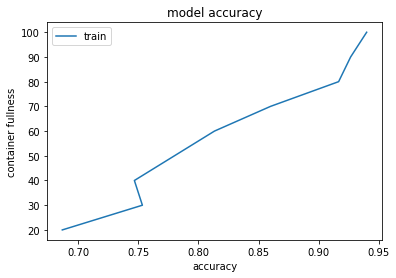

In [39]:
plt.plot(Accur, Q)
plt.title('model accuracy')
plt.ylabel('container fullness')
plt.xlabel('accuracy')
plt.legend(['train'], loc = 'upper left')
plt.show

Как и предполагалось, с увеличением процента заполненности контейнера точность уаеличивается